<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part2/ch05_normal.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.3 The Normal Distribution

The **Normal distribution** (also called **Gaussian distribution**) is the most important probability distribution in statistics. It appears everywhere in nature and mathematics.

---

## Why the Normal Distribution Matters

1. **Ubiquitous in nature**: Heights, weights, test scores, measurement errors
2. **Central Limit Theorem**: Sums of many random variables → Normal
3. **Mathematical convenience**: Easy to work with analytically
4. **Statistical inference**: Foundation of many statistical tests
5. **Maximum entropy**: Most "uninformed" distribution given mean and variance

---

## 5.3.1 The Standard Normal Distribution

We start with the **standard** normal, then generalize.

### Definition 5.11: Standard Normal Distribution

A random variable $Z$ has the **standard normal distribution** if its PDF is:

$$\phi(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}$$

for all $z \in \mathbb{R}$.

We write $Z \sim N(0, 1)$ or $Z \sim \mathcal{N}(0, 1)$.

### Properties

- **Symmetric** around 0
- **Bell-shaped** curve
- **Mean**: $E[Z] = 0$
- **Variance**: $\text{Var}(Z) = 1$
- **Total area**: $\int_{-\infty}^{\infty} \phi(z) dz = 1$

### Visualization

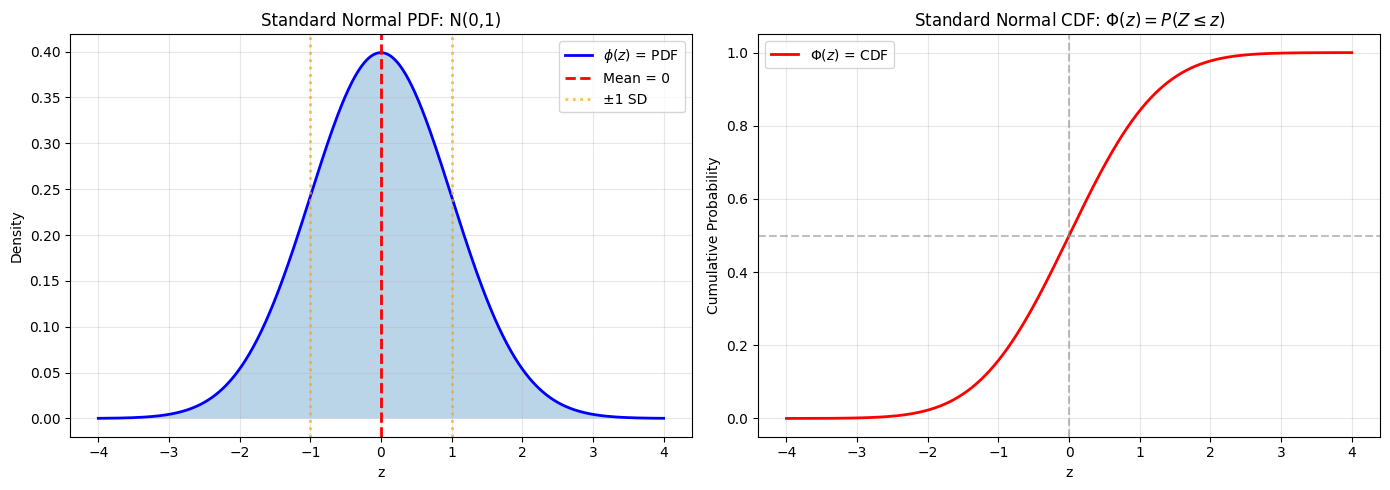

Standard Normal Properties:
P(Z ≤ 0) = 0.5000
P(-1 ≤ Z ≤ 1) = 0.6827
P(-2 ≤ Z ≤ 2) = 0.9545
P(-3 ≤ Z ≤ 3) = 0.9973


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Standard normal
z = np.linspace(-4, 4, 1000)
phi = stats.norm.pdf(z, 0, 1)
Phi = stats.norm.cdf(z, 0, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# PDF
ax1.plot(z, phi, 'b-', linewidth=2, label='$\\phi(z)$ = PDF')
ax1.fill_between(z, 0, phi, alpha=0.3)
ax1.axvline(0, color='r', linestyle='--', linewidth=2, label='Mean = 0')
ax1.axvline(-1, color='orange', linestyle=':', linewidth=2, alpha=0.7)
ax1.axvline(1, color='orange', linestyle=':', linewidth=2, alpha=0.7, label='±1 SD')
ax1.set_xlabel('z')
ax1.set_ylabel('Density')
ax1.set_title('Standard Normal PDF: N(0,1)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# CDF
ax2.plot(z, Phi, 'r-', linewidth=2, label='$\\Phi(z)$ = CDF')
ax2.axhline(0.5, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel('z')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('Standard Normal CDF: $\\Phi(z) = P(Z \\leq z)$')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Standard Normal Properties:")
print(f"P(Z ≤ 0) = {stats.norm.cdf(0, 0, 1):.4f}")
print(f"P(-1 ≤ Z ≤ 1) = {stats.norm.cdf(1, 0, 1) - stats.norm.cdf(-1, 0, 1):.4f}")
print(f"P(-2 ≤ Z ≤ 2) = {stats.norm.cdf(2, 0, 1) - stats.norm.cdf(-2, 0, 1):.4f}")
print(f"P(-3 ≤ Z ≤ 3) = {stats.norm.cdf(3, 0, 1) - stats.norm.cdf(-3, 0, 1):.4f}")

---

## 5.3.2 The Normal Distribution

Now generalize to any mean $\mu$ and variance $\sigma^2$.

### Definition 5.12: Normal Distribution

A random variable $X$ has a **normal distribution** with mean $\mu$ and variance $\sigma^2$ if:

$$p(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-(x-\mu)^2/(2\sigma^2)}$$

for all $x \in \mathbb{R}$.

We write $X \sim N(\mu, \sigma^2)$ or $X \sim \mathcal{N}(\mu, \sigma^2)$.

**Note**: Some sources use $N(\mu, \sigma)$ (with standard deviation instead of variance). Always check!

### Useful Facts 5.9: Mean and Variance of Normal

For $X \sim N(\mu, \sigma^2)$:
1. **Mean**: $E[X] = \mu$
2. **Variance**: $\text{Var}(X) = \sigma^2$
3. **Standard deviation**: $\text{std}(X) = \sigma$

### Standardization

**Key Transformation**: If $X \sim N(\mu, \sigma^2)$, then:

$$Z = \frac{X - \mu}{\sigma} \sim N(0, 1)$$

This is called **standardization** or **z-score transformation**.

**Reverse**: If $Z \sim N(0, 1)$, then:

$$X = \mu + \sigma Z \sim N(\mu, \sigma^2)$$

### Visualization of Different Parameters

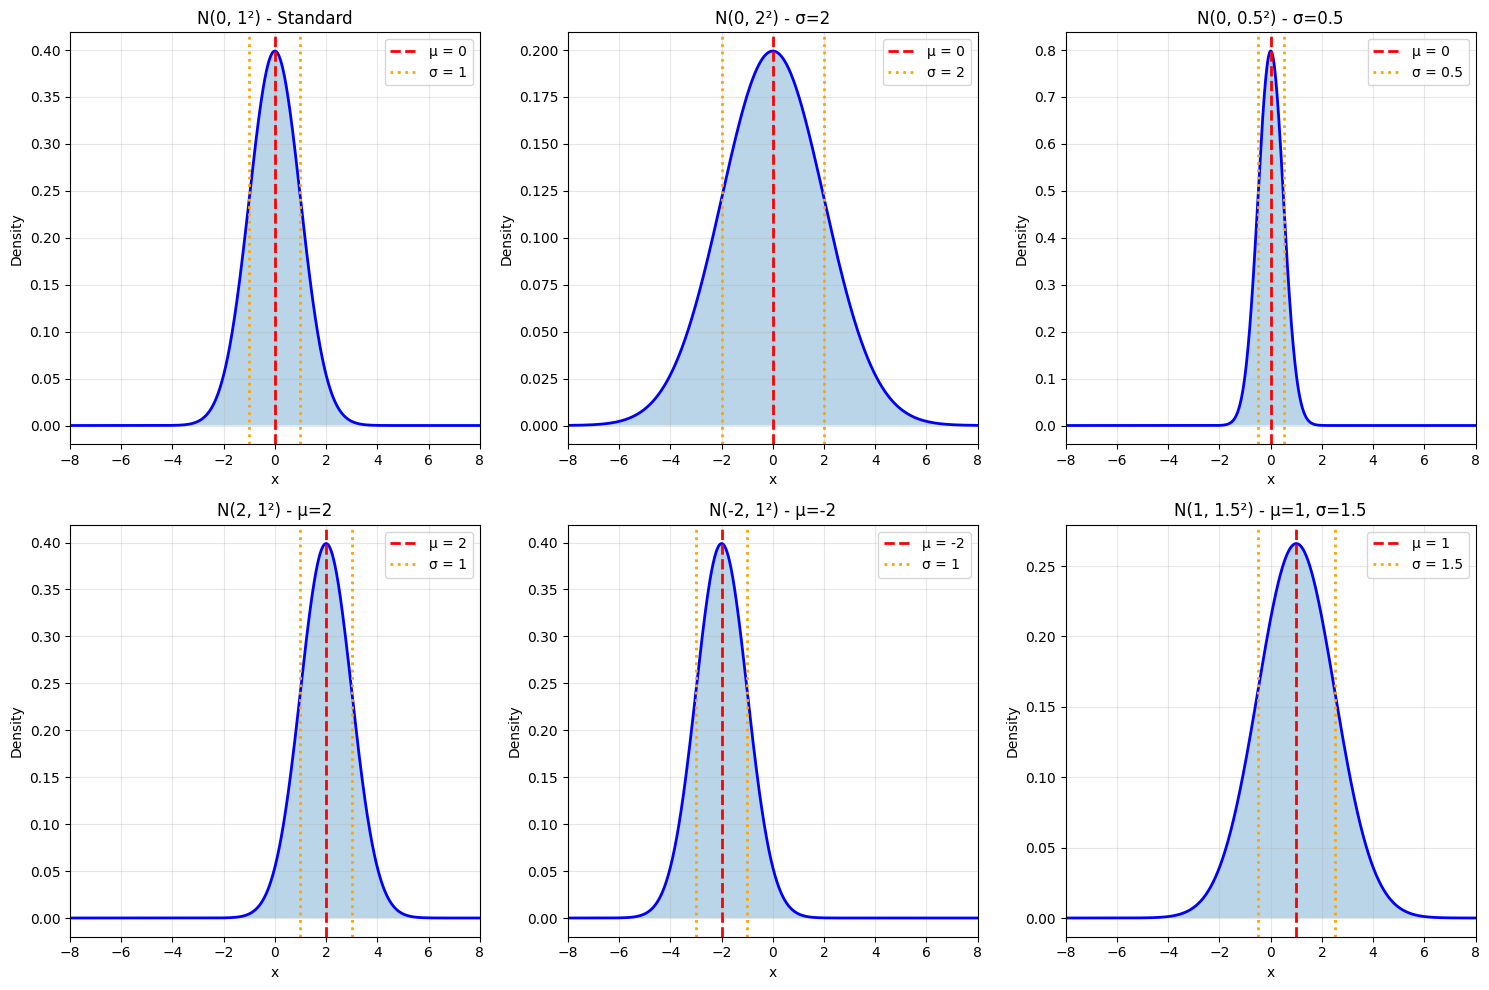

In [2]:
# Different normal distributions
params = [
    (0, 1, 'Standard'),
    (0, 2, 'σ=2'),
    (0, 0.5, 'σ=0.5'),
    (2, 1, 'μ=2'),
    (-2, 1, 'μ=-2'),
    (1, 1.5, 'μ=1, σ=1.5')
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

x = np.linspace(-8, 8, 1000)

for idx, (mu, sigma, desc) in enumerate(params):
    pdf = stats.norm.pdf(x, mu, sigma)
    
    axes[idx].plot(x, pdf, 'b-', linewidth=2)
    axes[idx].fill_between(x, 0, pdf, alpha=0.3)
    axes[idx].axvline(mu, color='r', linestyle='--', linewidth=2, 
                      label=f'μ = {mu}')
    axes[idx].axvline(mu - sigma, color='orange', linestyle=':', linewidth=2)
    axes[idx].axvline(mu + sigma, color='orange', linestyle=':', linewidth=2,
                      label=f'σ = {sigma}')
    
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('Density')
    axes[idx].set_title(f'N({mu}, {sigma}²) - {desc}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlim([-8, 8])

plt.tight_layout()
plt.show()

---

## 5.3.3 Properties of the Normal Distribution

### The 68-95-99.7 Rule (Empirical Rule)

For $X \sim N(\mu, \sigma^2)$:

- **68%** of data within $\mu \pm \sigma$
- **95%** of data within $\mu \pm 2\sigma$
- **99.7%** of data within $\mu \pm 3\sigma$

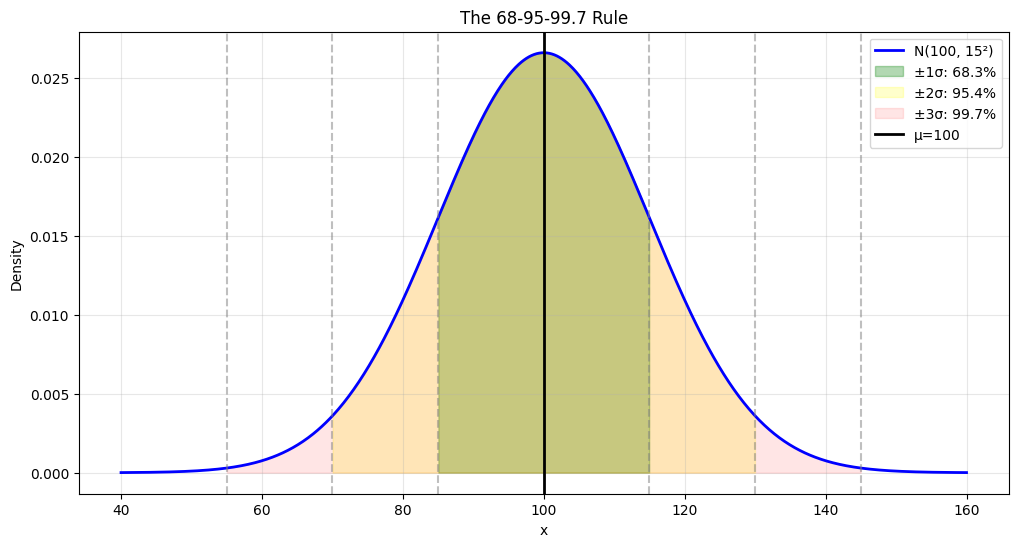

In [3]:
# Visualize 68-95-99.7 rule
mu, sigma = 100, 15
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(12, 6))
plt.plot(x, pdf, 'b-', linewidth=2, label='N(100, 15²)')

# Fill regions
for k, color, alpha in [(1, 'green', 0.3), (2, 'yellow', 0.2), (3, 'red', 0.1)]:
    x_fill = x[(x >= mu - k*sigma) & (x <= mu + k*sigma)]
    pdf_fill = stats.norm.pdf(x_fill, mu, sigma)
    pct = stats.norm.cdf(mu + k*sigma, mu, sigma) - stats.norm.cdf(mu - k*sigma, mu, sigma)
    plt.fill_between(x_fill, 0, pdf_fill, alpha=alpha, color=color,
                     label=f'±{k}σ: {pct*100:.1f}%')

plt.axvline(mu, color='black', linestyle='-', linewidth=2, label=f'μ={mu}')
for k in [1, 2, 3]:
    plt.axvline(mu - k*sigma, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(mu + k*sigma, color='gray', linestyle='--', alpha=0.5)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('The 68-95-99.7 Rule')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

### Linear Combinations

**Important Property**: Normal distributions are **closed under linear combinations**.

If $X \sim N(\mu_X, \sigma_X^2)$ and $Y \sim N(\mu_Y, \sigma_Y^2)$ are **independent**, then:

$$aX + bY + c \sim N(a\mu_X + b\mu_Y + c, \, a^2\sigma_X^2 + b^2\sigma_Y^2)$$

**Special case**: If $X_1, \ldots, X_n$ are independent $N(\mu, \sigma^2)$, then:

$$\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i \sim N\left(\mu, \frac{\sigma^2}{n}\right)$$

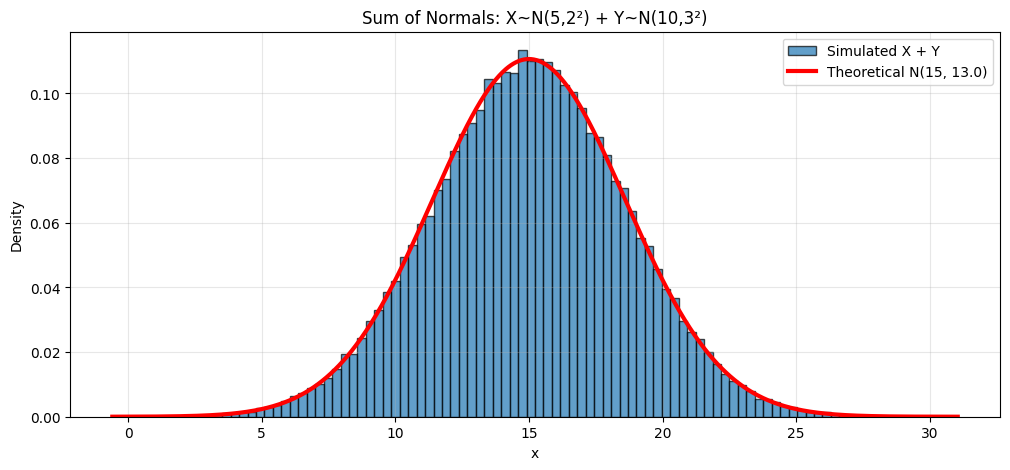

Theoretical: μ=15, σ=3.606
Simulated: μ=15.005, σ=3.614


In [4]:
# Demonstrate: Sum of normals is normal
np.random.seed(42)
mu1, sigma1 = 5, 2
mu2, sigma2 = 10, 3

# Theory
mu_sum = mu1 + mu2
sigma_sum = np.sqrt(sigma1**2 + sigma2**2)

# Simulation
n_sims = 100000
X = np.random.normal(mu1, sigma1, n_sims)
Y = np.random.normal(mu2, sigma2, n_sims)
S = X + Y

plt.figure(figsize=(12, 5))
plt.hist(S, bins=100, density=True, alpha=0.7, edgecolor='black',
         label='Simulated X + Y')

x = np.linspace(S.min(), S.max(), 1000)
plt.plot(x, stats.norm.pdf(x, mu_sum, sigma_sum), 'r-', linewidth=3,
         label=f'Theoretical N({mu_sum}, {sigma_sum**2:.1f})')

plt.xlabel('x')
plt.ylabel('Density')
plt.title(f'Sum of Normals: X~N({mu1},{sigma1}²) + Y~N({mu2},{sigma2}²)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Theoretical: μ={mu_sum}, σ={sigma_sum:.3f}")
print(f"Simulated: μ={np.mean(S):.3f}, σ={np.std(S):.3f}")

### Quantiles and Percentiles

**Definition**: The **$p$-quantile** (or **$100p$-th percentile**) is the value $x_p$ such that:

$$P(X \leq x_p) = p$$

For standard normal $Z \sim N(0,1)$:
- $z_{0.025} \approx -1.96$ (2.5th percentile)
- $z_{0.50} = 0$ (median)
- $z_{0.975} \approx 1.96$ (97.5th percentile)

In [5]:
# Important quantiles
quantiles = [0.01, 0.025, 0.05, 0.1, 0.5, 0.9, 0.95, 0.975, 0.99]

print("Standard Normal Quantiles:")
for q in quantiles:
    z_q = stats.norm.ppf(q, 0, 1)
    print(f"z_{{{q:.3f}}} = {z_q:6.3f}")

print("\nCommonly Used:")
print(f"z_0.025 = {stats.norm.ppf(0.025):.4f} (for 95% CI)")
print(f"z_0.005 = {stats.norm.ppf(0.005):.4f} (for 99% CI)")

Standard Normal Quantiles:
z_{0.010} = -2.326
z_{0.025} = -1.960
z_{0.050} = -1.645
z_{0.100} = -1.282
z_{0.500} =  0.000
z_{0.900} =  1.282
z_{0.950} =  1.645
z_{0.975} =  1.960
z_{0.990} =  2.326

Commonly Used:
z_0.025 = -1.9600 (for 95% CI)
z_0.005 = -2.5758 (for 99% CI)


### Computing Probabilities

**Example**: IQ scores are $N(100, 15^2)$. What's the probability someone has IQ > 130?

In [6]:
mu, sigma = 100, 15

# Method 1: Direct computation
prob1 = 1 - stats.norm.cdf(130, mu, sigma)

# Method 2: Standardize first
z = (130 - mu) / sigma
prob2 = 1 - stats.norm.cdf(z, 0, 1)

print(f"IQ scores: N({mu}, {sigma}²)")
print(f"P(IQ > 130) = {prob1:.4f}")
print(f"z-score of 130: {z:.2f}")
print(f"P(Z > {z:.2f}) = {prob2:.4f}")

# What IQ is at 95th percentile?
iq_95 = stats.norm.ppf(0.95, mu, sigma)
print(f"\n95th percentile IQ: {iq_95:.1f}")

IQ scores: N(100, 15²)
P(IQ > 130) = 0.0228
z-score of 130: 2.00
P(Z > 2.00) = 0.0228

95th percentile IQ: 124.7


---

## The Central Limit Theorem (Informal)

One of the most important theorems in all of probability!

**Central Limit Theorem**: The sum (or average) of many independent random variables approaches a normal distribution, **regardless of the original distribution**!

### Demonstration

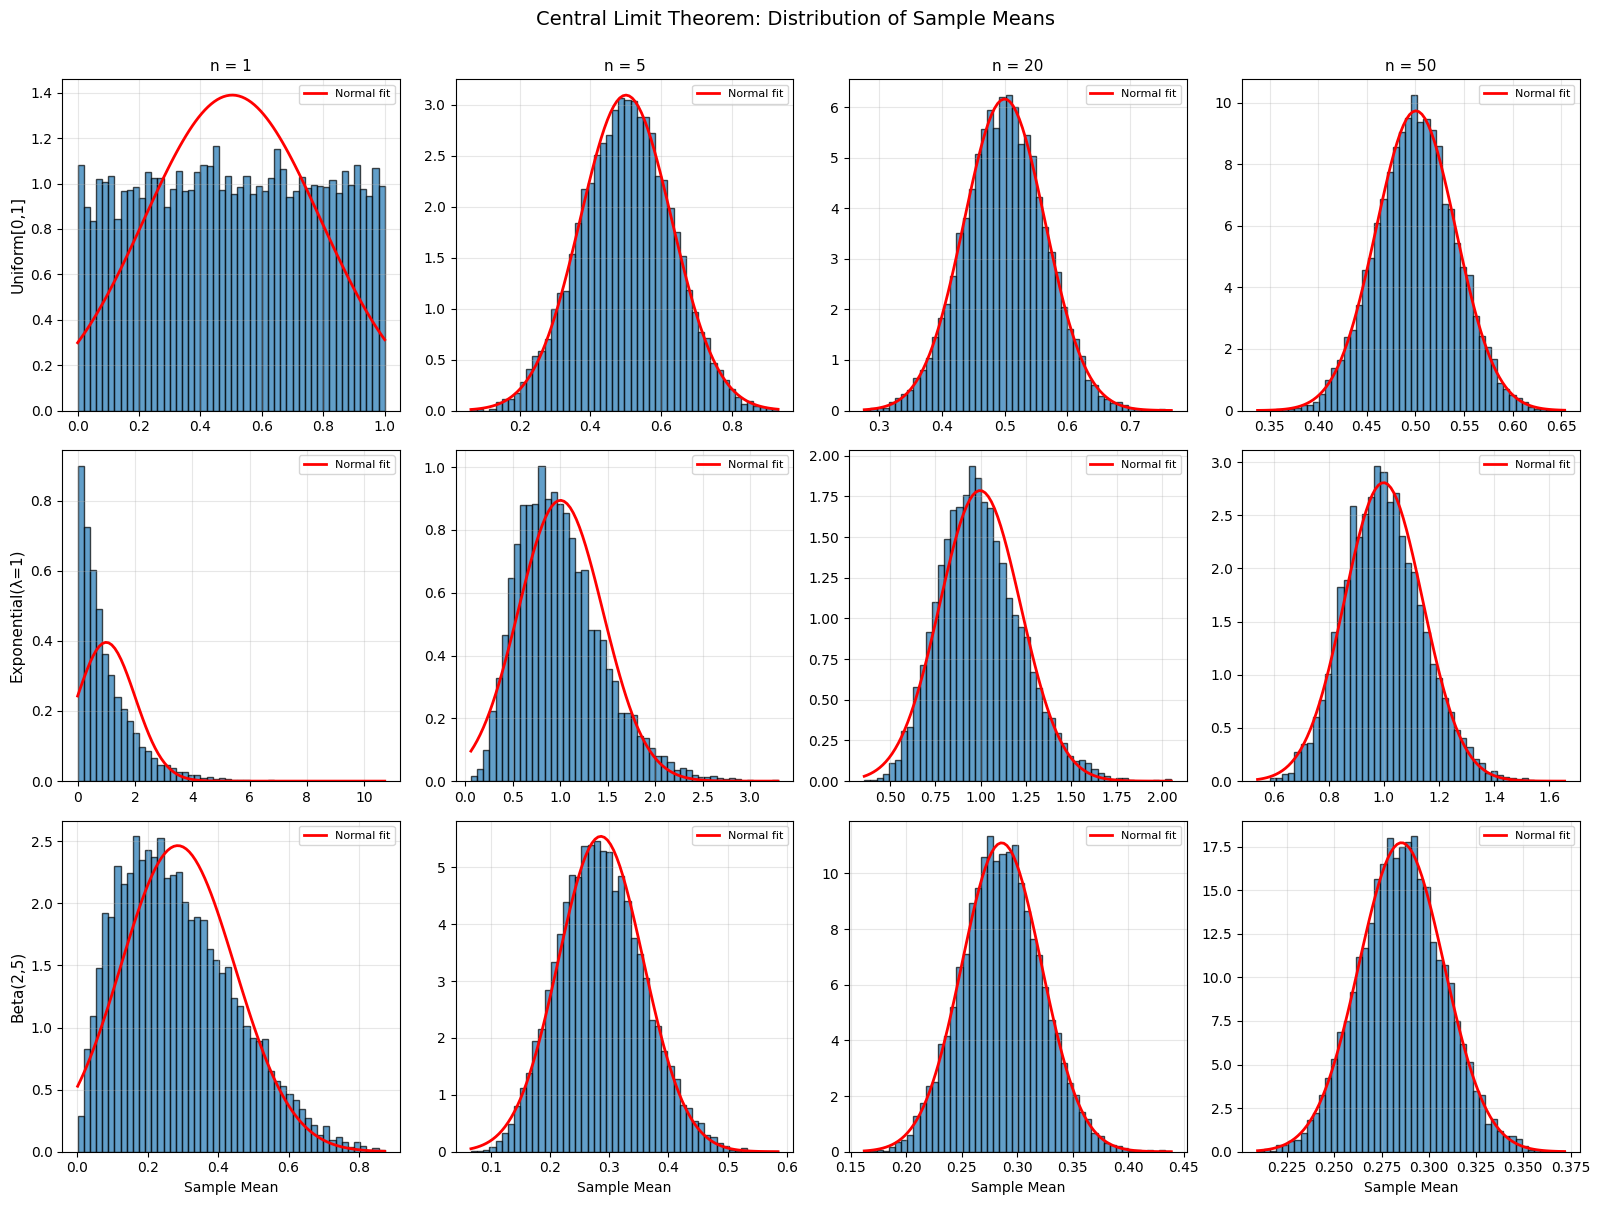

Notice: As n increases, distribution approaches normal,
        regardless of the source distribution!


In [7]:
# CLT demonstration with different source distributions
from scipy.stats import uniform, expon, beta as beta_dist

source_dists = [
    ('Uniform[0,1]', lambda n: np.random.uniform(0, 1, n)),
    ('Exponential(λ=1)', lambda n: np.random.exponential(1, n)),
    ('Beta(2,5)', lambda n: np.random.beta(2, 5, n)),
]

fig, axes = plt.subplots(len(source_dists), 4, figsize=(16, 12))

for row, (name, generator) in enumerate(source_dists):
    for col, n in enumerate([1, 5, 20, 50]):
        # Generate many sample means
        sample_means = [np.mean(generator(n)) for _ in range(10000)]
        
        ax = axes[row, col]
        ax.hist(sample_means, bins=50, density=True, alpha=0.7, edgecolor='black')
        
        # Overlay normal fit
        mu_hat = np.mean(sample_means)
        sigma_hat = np.std(sample_means)
        x = np.linspace(min(sample_means), max(sample_means), 100)
        ax.plot(x, stats.norm.pdf(x, mu_hat, sigma_hat), 'r-', linewidth=2,
                label='Normal fit')
        
        if col == 0:
            ax.set_ylabel(name, fontsize=11)
        if row == 0:
            ax.set_title(f'n = {n}', fontsize=11)
        if row == len(source_dists) - 1:
            ax.set_xlabel('Sample Mean')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)

plt.suptitle('Central Limit Theorem: Distribution of Sample Means', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

print("Notice: As n increases, distribution approaches normal,")
print("        regardless of the source distribution!")

---

## Summary

```{admonition} Key Facts About Normal Distribution
:class: important

**Standard Normal**: $Z \sim N(0, 1)$
$$\phi(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}$$

**General Normal**: $X \sim N(\mu, \sigma^2)$
$$p(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-(x-\mu)^2/(2\sigma^2)}$$

**Standardization**: $Z = \frac{X-\mu}{\sigma} \sim N(0,1)$

**68-95-99.7 Rule**: 
- 68% within $\mu \pm \sigma$
- 95% within $\mu \pm 2\sigma$  
- 99.7% within $\mu \pm 3\sigma$

**Linear combinations**: $aX + bY \sim N(a\mu_X + b\mu_Y, a^2\sigma_X^2 + b^2\sigma_Y^2)$

**Central Limit Theorem**: Sample means → Normal
```

---

## Practice Problems

1. If $X \sim N(50, 10^2)$, find:
   - $P(X > 60)$
   - $P(40 < X < 55)$
   - The 90th percentile of $X$

2. SAT scores are $N(1000, 200^2)$. What percentage score above 1300?

3. If $X \sim N(5, 4)$ and $Y \sim N(3, 9)$ are independent, find the distribution of $2X - Y + 1$.

4. Show that if $X \sim N(\mu, \sigma^2)$, then $aX + b \sim N(a\mu + b, a^2\sigma^2)$.

5. Use the CLT to explain why measurement errors are often normally distributed.

---

## Next Section

Now we'll see how to approximate binomial distributions with normals when $N$ is large!

→ Continue to [5.4 Normal Approximation to Binomial](ch05_approximation.md)

→ Return to [Chapter 5 Overview](chapter05.md)